In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score

In [2]:
housing = pd.read_csv('housing-classification-iter4.csv')

In [3]:
housing.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu
0,8450,65.0,856,3,0,0,2,0,0,0,...,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,NaN
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Y,CBlock,TA,TA,Gd,TA,Gd,ALQ,TA,TA
2,11250,68.0,920,3,1,0,2,0,0,0,...,Y,PConc,Gd,TA,Gd,TA,Mn,GLQ,Gd,TA
3,9550,60.0,756,3,1,0,3,0,0,0,...,Y,BrkTil,TA,TA,TA,Gd,No,ALQ,Gd,Gd
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Y,PConc,Gd,TA,Gd,TA,Av,GLQ,Gd,TA


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
 10  MSZoning      1460 non-null   object 
 11  Condition1    1460 non-null   object 
 12  Heating       1460 non-null   object 
 13  Street        1460 non-null   object 
 14  CentralAir    1460 non-null   object 
 15  Foundation    1460 non-null   object 
 16  ExterQual     1460 non-null   object 
 17  ExterCond     1460 non-null   object 
 18  BsmtQual      1423 non-null 

In [5]:
housing.duplicated().any()

True

In [6]:
housing.drop_duplicates(inplace=True)

In [7]:
housing.isna().any()

LotArea         False
LotFrontage      True
TotalBsmtSF     False
BedroomAbvGr    False
Fireplaces      False
PoolArea        False
GarageCars      False
WoodDeckSF      False
ScreenPorch     False
Expensive       False
MSZoning        False
Condition1      False
Heating         False
Street          False
CentralAir      False
Foundation      False
ExterQual       False
ExterCond       False
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
KitchenQual     False
FireplaceQu      True
dtype: bool

# Categorical data

## OneHotEncoder vs OrdinalEncoder

We've been using the term categorical to describe non-numerical data up to this point. Our categorical data can be divided into two subcategories. One of these subcategories is also known as Categorical, which is a bit confusing. The other subcategory is Ordinal.

Categorical variables are made up of two or more categories with no inherent order.
* male, female, non-binary
* German, Indian, Russian, Vietnamese

Ordinal variables are similar to categorical variables, but there is a distinct order to them.
* very bad, bad, ok, good, very good
* high school graduate, bachelor's degree holder, master's degree holder, doctorate holder

By giving Categorical variables extra columns, OneHotEncoder ensures that there is no implied order between them. We can, however, create a numerical order with Ordinal variables (e.g., very bad = 0, bad = 1, ok = 2, good = 3, very good = 4).

OneHotEncoder converts Categorical variables into extra columns. OrdinalEncoder converts Ordinal variables to numerical values.

We now need to determine which of our categorical columns are Ordinal, and which are Categorical

In [8]:
list(housing.select_dtypes(include=['object']))

['MSZoning',
 'Condition1',
 'Heating',
 'Street',
 'CentralAir',
 'Foundation',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'KitchenQual',
 'FireplaceQu']

Check these columns against data_description.txt to see which of these columns are ordinal

In [9]:
ordinal_columns = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu']

In [10]:
housing[ordinal_columns]

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu
0,Gd,TA,Gd,TA,No,GLQ,Gd,NaN
1,TA,TA,Gd,TA,Gd,ALQ,TA,TA
2,Gd,TA,Gd,TA,Mn,GLQ,Gd,TA
3,TA,TA,TA,Gd,No,ALQ,Gd,Gd
4,Gd,TA,Gd,TA,Av,GLQ,Gd,TA
...,...,...,...,...,...,...,...,...
1455,TA,TA,Gd,TA,No,Unf,TA,TA
1456,TA,TA,Gd,TA,No,ALQ,TA,TA
1457,Ex,Gd,TA,Gd,No,GLQ,Gd,Gd
1458,TA,TA,TA,TA,Mn,GLQ,Gd,NaN


## Implementing OrdinalEncoder

OrdinalEncoder can't work if there are missing values, so first we need to fill in the blanks

In [11]:
housing[ordinal_columns].isna().any()

ExterQual       False
ExterCond       False
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
KitchenQual     False
FireplaceQu      True
dtype: bool

In [12]:
def check_cols_with_missing(df):
    nulls = df.isnull().sum()[df.isnull().any()==True]
    df_output = pd.DataFrame({
        "nulls":nulls})   
    return df_output

check_cols_with_missing(housing[ordinal_columns])

,nulls
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
FireplaceQu,684


Missing values are a subcategory in these columns. It indicates the absence of a basement or a fireplace in the home. As a result, we'll classify these missing values using the lowest ordinal value.

We'll fill them in with an obvious placeholder first, because the OrdinalEncoder can't work if there are missing values.

When using SKLearn to create a Pipeline, any object in the Pipeline must be able to use the fit and transform methods. FunctionTransformer is used to accomplish this. We can use FunctionTransformer to create a custom function that can fit and transform data.

In [13]:
# This is the pandas way of filling in the missing values. However, we need to create a function to include in our Pipeline
housing_ordinal = housing[ordinal_columns].fillna('N_A').copy()

In [14]:
# Creating the custom function

# Make a function
def impute_categ_nulls(df):
    df = df.fillna("N_A")
    return df

# Import the FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Convert the function using the FunctionTransformer
cat_imputer = FunctionTransformer(impute_categ_nulls, validate=False)

Now we write out the categories we need to transform from each column

In [15]:
# Determine the order in which their categories should be placed (must be done manually, otherwise would be ordered arbitrarily)
ExterQual_cats = ["Po", "Fa", "TA", "Gd", "Ex"]
ExterCond_cats = ["Po", "Fa", "TA", "Gd", "Ex"]
BsmtQual_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtCond_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtExposure_cats = ["N_A", "No", "Mn", "Av", "Gd"]
BsmtFinType1_cats = ["N_A", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
KitchenQual_cats = ["Po", "Fa", "TA", "Gd", "Ex"]
FireplaceQu_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]

cats_ord = [ExterQual_cats, ExterCond_cats, BsmtQual_cats,
            BsmtCond_cats, BsmtExposure_cats, BsmtFinType1_cats,
            KitchenQual_cats, FireplaceQu_cats,]

In [16]:
ord_encoder = OrdinalEncoder(categories=cats_ord)

# Including Ordinal Encoder in to our pipeline

Again we need to ColumnTransform first (as we are transforming only part of our data), then we include the ColumnTransformer in to our Pipeline (where we transform all the data as one)

In [17]:
X = housing.drop(columns="Expensive")
y = housing["Expensive"]

In [18]:
from sklearn.preprocessing import OrdinalEncoder

numeric_features = list(X.select_dtypes(exclude=["object"]))

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="median")
)

categorical_features_ordinal = ordinal_columns
categorical_transformer_ordinal = OrdinalEncoder(categories=cats_ord)
categorical_features_onehot = list(set(list(X.select_dtypes(include=["object"]))) - set(ordinal_columns))
categorical_transformer_onehot = OneHotEncoder(handle_unknown="ignore")

categorical_preprocessor = ColumnTransformer(
    transformers=[
        ("cat_ordinal", categorical_transformer_ordinal, categorical_features_ordinal),
        ("cat_onehot", categorical_transformer_onehot, categorical_features_onehot),
    ]
)

categorical_pipe = make_pipeline(
    cat_imputer,
    categorical_preprocessor
)


cat_num_preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, numeric_features),
        ("cat_pipe", categorical_pipe, list(X.select_dtypes(include=["object"]))),
    ]
)

final_pipe = make_pipeline(
    cat_num_preprocessor,
    StandardScaler(),
    DecisionTreeClassifier()
)

pipe_params = {
    'decisiontreeclassifier__criterion': ['squared_error'],
    'decisiontreeclassifier__max_depth': range(5, 50, 5),
    'decisiontreeclassifier__min_samples_split': [2, 4, 6],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 5]
}

clf = GridSearchCV(final_pipe, pipe_params, cv = 10, scoring='f1')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

clf.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__min_samples_split': 6}

In [19]:
y_pred = clf.predict(X_test)

dtc_accuracy = accuracy_score(y_test, y_pred)
dtc_accuracy

0.9037800687285223

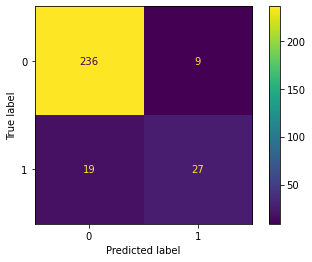

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)